In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (5).zip to archive (5).zip


In [7]:
import zipfile
import os

zip_filename = "archive (5).zip"
extract_to = "/content/my_folder"

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Unzipped to: {extract_to}")


Unzipped to: /content/my_folder


In [17]:
from pathlib import Path
from collections import defaultdict

base_path = Path("/content/my_folder")

# Store image paths by emotion"
emotion_split_paths = defaultdict(list)
for split in ["train", "test"]:
    for emotion_dir in (base_path / split).iterdir():
        if emotion_dir.is_dir():
            for img in emotion_dir.glob("*.png"):
                emotion_split_paths[f"{split}/{emotion_dir.name}"].append(img)


In [23]:
import shutil
from pathlib import Path

# Start from the original dataset
source_path = Path("/content/my_folder")


# Create filtered version (happy vs not_happy)
filtered_base = Path("/mnt/data/binary_filtered_dataset_v2/images")
(happy_dir := filtered_base / "happy").mkdir(parents=True, exist_ok=True)
(not_happy_dir := filtered_base / "not_happy").mkdir(parents=True, exist_ok=True)

# Define what to include
happy_classes = ["Happy"]
not_happy_classes = ["Disgust", "Sad"]

# Copy images
for split in ["train", "test"]:
    for emotion in happy_classes:
        for img in (source_path / split / emotion).glob("*.png"):
            shutil.copy(img, happy_dir / img.name)
    for emotion in not_happy_classes:
        for img in (source_path / split / emotion).glob("*.png"):
            shutil.copy(img, not_happy_dir / img.name)



Showing GRAYSCALE HAPPY images:
happy image 1: (48, 48)
happy image 2: (48, 48)
happy image 3: (48, 48)
happy image 4: (48, 48)
happy image 5: (48, 48)


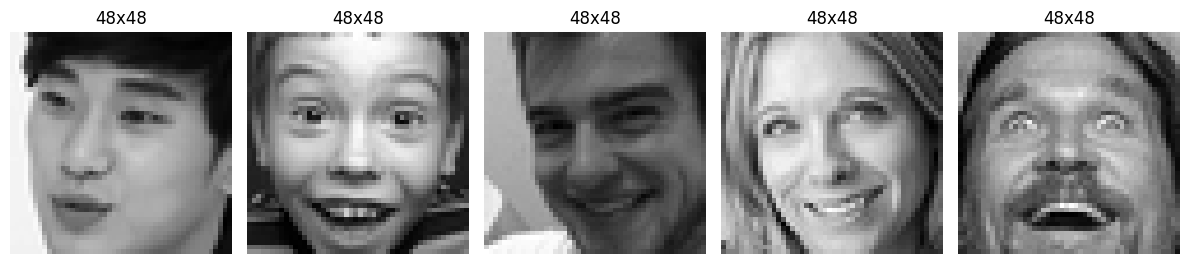


Showing GRAYSCALE NOT_HAPPY images:
not_happy image 1: (48, 48)
not_happy image 2: (48, 48)
not_happy image 3: (48, 48)
not_happy image 4: (48, 48)
not_happy image 5: (48, 48)


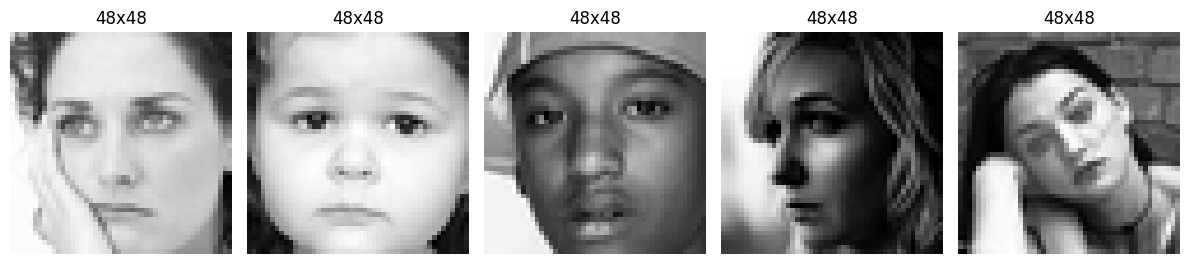

In [24]:
import cv2
import matplotlib.pyplot as plt
import os
import random

# Define folders
happy_path = "/mnt/data/binary_filtered_dataset_v2/images/happy"
not_happy_path = "/mnt/data/binary_filtered_dataset_v2/images/not_happy"

# Sample image filenames
happy_images = random.sample(os.listdir(happy_path), 5)
not_happy_images = random.sample(os.listdir(not_happy_path), 5)

# Function to display grayscale images and print their shape
def show_grayscale_images(img_list, label, folder):
    print(f"\nShowing GRAYSCALE {label.upper()} images:")
    plt.figure(figsize=(12, 3))
    for i, img_name in enumerate(img_list):
        img_path = os.path.join(folder, img_name)
        img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
        print(f"{label} image {i+1}: {img_gray.shape}")  # (height, width)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img_gray, cmap='gray')
        plt.title(f"{img_gray.shape[0]}x{img_gray.shape[1]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show grayscale images
show_grayscale_images(happy_images, "happy", happy_path)
show_grayscale_images(not_happy_images, "not_happy", not_happy_path)



In [25]:
# Define paths
happy_path = "/mnt/data/binary_filtered_dataset_v2/images/happy"
not_happy_path = "/mnt/data/binary_filtered_dataset_v2/images/not_happy"

# Count number of .png files
happy_count = len([f for f in os.listdir(happy_path) if f.endswith(".png")])
not_happy_count = len([f for f in os.listdir(not_happy_path) if f.endswith(".png")])

print(f"Number of Happy images: {happy_count}")
print(f"Number of Not Happy images: {not_happy_count}")


Number of Happy images: 8094
Number of Not Happy images: 11506


# Balancing the dataset

In [26]:


# Define input paths
happy_dir = Path("/mnt/data/binary_filtered_dataset_v2/images/happy")
not_happy_dir = Path("/mnt/data/binary_filtered_dataset_v2/images/not_happy")

# Define output path
balanced_base = Path("/mnt/data/binary_filtered_balanced_v2/images")
(happy_out := balanced_base / "happy").mkdir(parents=True, exist_ok=True)
(not_happy_out := balanced_base / "not_happy").mkdir(parents=True, exist_ok=True)

# Get image paths
happy_images = list(happy_dir.glob("*.png"))
not_happy_images = list(not_happy_dir.glob("*.png"))

# Balance: sample same number of Not Happy as Happy
random.seed(42)
not_happy_sample = random.sample(not_happy_images, len(happy_images))

# Clear output dirs if needed
for f in happy_out.glob("*"): f.unlink()
for f in not_happy_out.glob("*"): f.unlink()

# Copy files to balanced folders
for img in happy_images:
    shutil.copy(img, happy_out / img.name)
for img in not_happy_sample:
    shutil.copy(img, not_happy_out / img.name)

print(f"Balanced dataset created with {len(happy_images)} images per class.")


Balanced dataset created with 8094 images per class.


not_happy_sample = random.sample(not_happy_images, len(happy_images))
downsamples the dataset by rendom pick of 8,904 images out of 11k

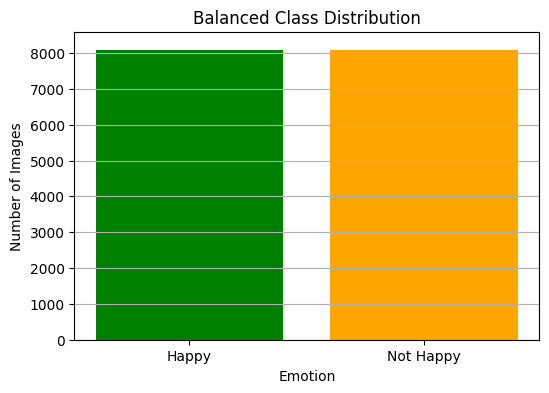

In [46]:
import matplotlib.pyplot as plt

# Class counts
class_names = ['Happy', 'Not Happy']
image_counts = [len(happy_images), len(not_happy_sample)]
# Plot
plt.figure(figsize=(6, 4))
plt.bar(class_names, image_counts, color=['green', 'orange'])
plt.title("Balanced Class Distribution")
plt.xlabel("Emotion")
plt.ylabel("Number of Images")
plt.ylim(0, max(image_counts) + 500)
plt.grid(axis='y')
plt.show()


In [30]:


# Paths to balanced dataset
happy_path = "/mnt/data/binary_filtered_balanced_v2/images/happy"
not_happy_path = "/mnt/data/binary_filtered_balanced_v2/images/not_happy"

# Count only .png files
happy_count = len([f for f in os.listdir(happy_path) if f.endswith(".png")])
not_happy_count = len([f for f in os.listdir(not_happy_path) if f.endswith(".png")])

print(f"Number of Happy images: {happy_count}")
print(f"Number of Not Happy images: {not_happy_count}")


Number of Happy images: 8094
Number of Not Happy images: 8094


# Modelling

In [49]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# === Paths and DataFrame ===
base_path = Path("/mnt/data/binary_filtered_balanced_v2/images")
happy_paths = list((base_path / "happy").glob("*.png"))
not_happy_paths = list((base_path / "not_happy").glob("*.png"))

df = pd.DataFrame({
    "path": happy_paths + not_happy_paths,
    "label": [1]*len(happy_paths) + [0]*len(not_happy_paths)
}).sample(frac=1, random_state=42).reset_index(drop=True)

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
train_df["path"] = train_df["path"].astype(str)
val_df["path"] = val_df["path"].astype(str)
train_df["label"] = train_df["label"].astype(str)
val_df["label"] = val_df["label"].astype(str)

# === Image Generators with Augmentation ===
IMG_SIZE = (48, 48)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    train_df,
    x_col="path",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True
)

val_gen = val_datagen.flow_from_dataframe(
    val_df,
    x_col="path",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

# === CNN Model ===
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# === Early Stopping Callback ===
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# === Train Model ===
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,  # More epochs since early stopping is active
    callbacks=[early_stop]
)


Found 12950 validated image filenames belonging to 2 classes.
Found 3238 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 66s 155ms/step - accuracy: 0.5199 - loss: 0.6929 - val_accuracy: 0.6822 - val_loss: 0.6078
Epoch 2/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 63s 156ms/step - accuracy: 0.6850 - loss: 0.6099 - val_accuracy: 0.7752 - val_loss: 0.4662
Epoch 3/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 63s 156ms/step - accuracy: 0.7492 - loss: 0.5133 - val_accuracy: 0.8125 - val_loss: 0.4357
Epoch 4/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 62s 152ms/step - accuracy: 0.7798 - loss: 0.4642 - val_accuracy: 0.8329 - val_loss: 0.3922
Epoch 5/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 63s 155ms/step - accuracy: 0.8094 - loss: 0.4159 - val_accuracy: 0.8277 - val_loss: 0.3843
Epoch 6/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 62s 153ms/step - accuracy: 0.8142 - loss: 0.4170 - val_accuracy: 0.8443 - val_loss: 0.3617
Epoch 7/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 83s 156ms/step - accuracy: 0.8190 - loss: 0.3943 - val_accuracy: 0.8249 - val_loss: 0.3924
Epoch 8/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 62s 153ms/step - accuracy: 0.8352 - loss: 0

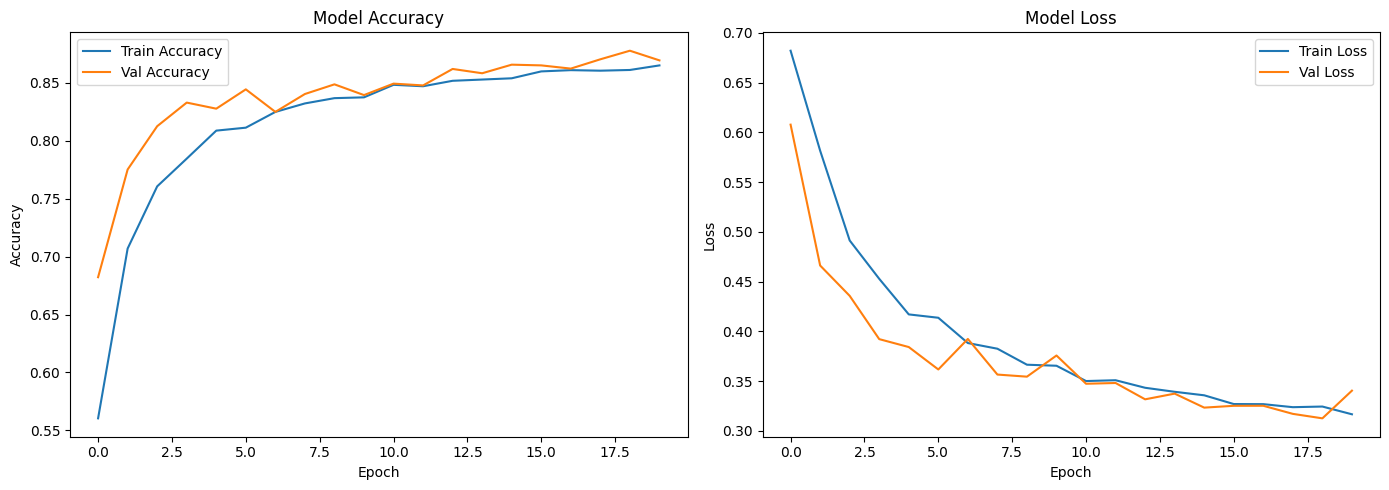

In [50]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [53]:
# Get final epoch's accuracy values
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

# Print as percentages with 2 decimal places
print(f"Final Training Accuracy: {train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {val_acc * 100:.2f}%")


Final Training Accuracy: 86.50%
Final Validation Accuracy: 86.94%


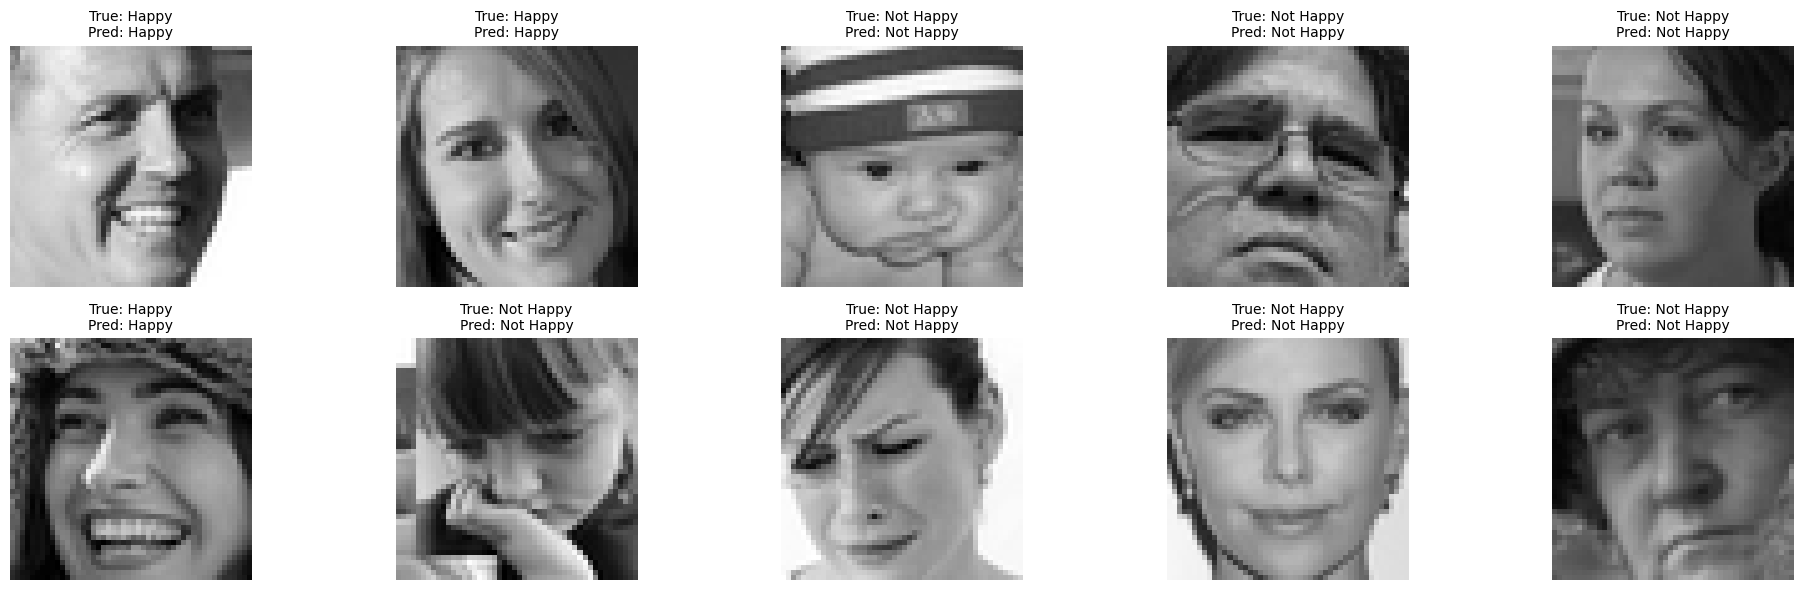

In [54]:
import matplotlib.pyplot as plt
import cv2
import random

# Map numeric labels to class names
label_map = {0: "Not Happy", 1: "Happy"}

# Get file paths from the generator
file_paths = val_gen.filepaths

# Select random 10 indices
sample_indices = random.sample(range(len(file_paths)), 10)

# Plot
plt.figure(figsize=(20, 6))
for i, idx in enumerate(sample_indices):
    img_path = file_paths[idx]
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    true_label = label_map[true_labels[idx]]
    pred_label = label_map[pred_labels[idx]]

    plt.subplot(2, 5, i + 1)
    plt.imshow(img_rgb)
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()
